In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# I. Data Understanding

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


## 1. Xét các dòng và các cột

In [3]:
n_rows , n_cols = hotel_df.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột')

Dữ liệu có 119390 dòng và 32 cột


## 2. Ý nghĩa của từng cột và hàng

In [4]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

+ Mỗi hàng là thông tin của 1 khách hàng đặt phòng khách 

+ Ý nghĩa của từng cột trong dữ liệu được tóm tắt trong bảng sau:

| **TÊN CỘT**                         | **MÔ TẢ**                                       | **KIỂU DỮ LIỆU**   |
|:---------------------------------|:---------------------------------------------|:----------------|
| **`hotel`**                           | Loại khách sạn                              | Chuỗi (String)|
| **`is_canceled`**                     | Đánh dấu liệu đặt phòng đã bị hủy          | Số nguyên (Integer)|
| **`lead_time`**                       | Thời gian từ đặt phòng đến nhận phòng      | Số nguyên (Integer)|
| **`arrival_date_year`**               | Năm của ngày nhận phòng                     | Số nguyên (Integer)|
| **`arrival_date_month`**              | Tháng của ngày nhận phòng                   | Chuỗi (String)|
| **`arrival_date_week_number`**        | Tuần trong năm của ngày nhận phòng          | Số nguyên (Integer)|
| **`arrival_date_day_of_month`**       | Ngày trong tháng của ngày nhận phòng        | Số nguyên (Integer)|
| **`stays_in_weekend_nights`**         | Số đêm nghỉ cuối tuần                       | Số nguyên (Integer)|
| **`stays_in_week_nights`**            | Số đêm nghỉ trong tuần                     | Số nguyên (Integer)|
| **`adults`**                          | Số người lớn                                | Số nguyên (Integer)|
| **`children`**                        | Số trẻ em                                   | Số nguyên (Integer)|
| **`babies`**                          | Số em bé                                    | Số nguyên (Integer)|
| **`meal`**                            | Loại bữa ăn đặt phòng                      | Chuỗi (String)|
| **`country`**                         | Quốc gia của khách hàng                     | Chuỗi (String)|
| **`market_segment`**                  | Phân khúc thị trường                        | Chuỗi (String)|
| **`distribution_channel`**            | Kênh phân phối                              | Chuỗi (String)|
| **`is_repeated_guest`**               | Đánh dấu liệu khách hàng là khách quen trở lại | Số nguyên (Integer)|
| **`previous_cancellations`**          | Số lần hủy đặt phòng trước đó của khách hàng | Số nguyên (Integer)|
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó không bị hủy của khách hàng | Số nguyên (Integer)|
| **`reserved_room_type`**              | Loại phòng được đặt trước                   | Chuỗi (String)|
| **`assigned_room_type`**              | Loại phòng được chỉ định cho khách hàng     | Chuỗi (String)|
| **`booking_changes`**                 | Số lần thay đổi đặt phòng                  | Số nguyên (Integer)|
| **`deposit_type`**                    | Loại tiền đặt cọc đã được thanh toán       | Chuỗi (String)|
| **`agent`**                           | Mã đại lý đặt phòng                         | Số nguyên (Integer)|
| **`company`**                         | Mã công ty đặt phòng                        | Số nguyên (Integer)|
| **`days_in_waiting_list`**            | Số ngày trong danh sách chờ                | Số nguyên (Integer)|
| **`customer_type`**                   | Loại khách hàng                             | Chuỗi (String)|
| **`adr`**                             | Tỉ lệ thuê phòng trung bình                | Số thập phân (Float)|
| **`required_car_parking_spaces`**     | Số lượng chỗ đậu xe cần thiết              | Số nguyên (Integer)|
| **`total_of_special_requests`**       | Tổng số yêu cầu đặc biệt                   | Số nguyên (Integer)|
| **`reservation_status`**              | Trạng thái của đặt phòng                   | Chuỗi (String)|
| **`reservation_status_date`**         | Ngày cập nhật trạng thái đặt phòng         | Chuỗi (String)|


## 3. Kiểm tra và xử lý trùng lắp dữ liệu (Duplicate)

In [5]:
duplicated_rows = hotel_df.duplicated().sum()

if duplicated_rows == 0:
    print('Không có hàng trùng lặp, nghĩa là mỗi hàng trong DataFrame là duy nhất.')
    print('Vì vậy chúng ta không cần tiếp tục xử lý các dòng trùng lặp')
else:
    print(f'Có {duplicated_rows} hàng trùng lặp chiếm tỷ lệ {np.round(duplicated_rows / hotel_df.shape[0] * 100, 2)} % vì vậy nên chúng ta sẽ xóa {duplicated_rows} hàng')
    hotel_df = hotel_df.drop_duplicates()
    print(f'Sau khi xóa các hàng trùng lặp, có {hotel_df.shape[0]} hàng còn lại')

Có 31994 hàng trùng lặp chiếm tỷ lệ 26.8 % vì vậy nên chúng ta sẽ xóa 31994 hàng
Sau khi xóa các hàng trùng lặp, có 87396 hàng còn lại


## 4. Phân tích tỷ lệ thiếu dữ liệu ở hàng và cột (Missing Values)

#### 👉Tỷ lệ thiếu ở các cột

In [6]:
missing_dict = {}

for col in hotel_df.columns:
    if type(hotel_df[col].iloc[0]) == list:
        missing_dict[col] = hotel_df[col].apply(lambda x: len(x) == 0).sum() / hotel_df.shape[0] * 100
    else:
        missing_dict[col] = hotel_df[col].isna().sum() / hotel_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
company,93.982562
agent,13.951439
country,0.517186
children,0.004577


In [7]:
# cols = ['agent', 'country']
# hotel_df[hotel_df['country'].isnull()][cols] # 452 dong
# df = hotel_df.copy()
# df.dropna(subset=cols, how='all', inplace=True)
# df[df['country'].isnull()][cols]
# df['country'].isnull().sum() / df.shape[0] * 100
# # df[df['country'].isnull()]['agent']

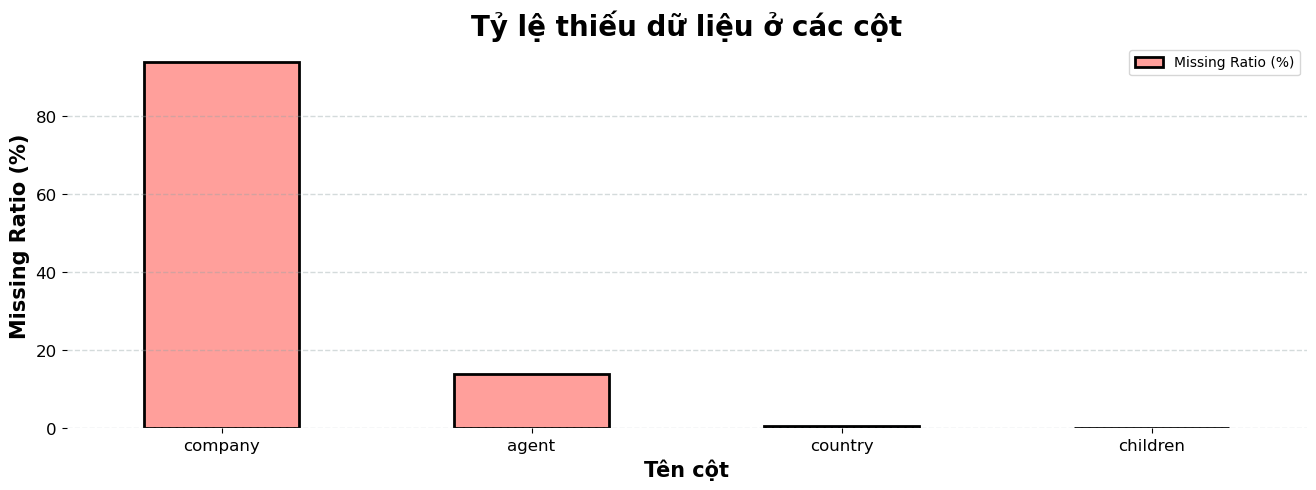

In [8]:
missing_ratio_df = missing_df.copy()
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Tỷ lệ thiếu dữ liệu ở các cột', fontsize=20, fontweight='bold')
plt.xlabel('Tên cột', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

## 5. Fill missing value

In [9]:
hotel_df = hotel_df.fillna(-1)

# II. EDA 1D

In [10]:
numeric_cols = hotel_df.select_dtypes(exclude=['object']).columns
cate_cols = hotel_df.select_dtypes(include=['object']).columns

## 1. Phân phối dữ liệu cột số

### 👉 **Thống kê tóm tắt** 

Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Tối thiểu
- Tứ phân vị dưới
- Trung vị
- Tứ phân vị trên
- Tối đa

Chúng ta sẽ lưu kết quả vào DataFrame `num_col_dist_df`, trong đó:
- Tên các cột là tên các cộthotelrong `anime_df`
- Tên các hàng: `missing_ratio`, `min`, `low_quartile`, `median`, `upper_quartile`, `max`

In [11]:
num_col_dist_df = hotel_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage

num_col_dist_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00
mean,0.27,79.89,2016.21,26.84,15.82,1.01,2.63,1.88,0.14,0.01,0.04,0.03,0.18,0.27,80.87,10.08,0.75,106.34,0.08,0.70
std,0.45,86.05,0.69,13.67,8.84,1.03,2.05,0.63,0.46,0.11,0.19,0.37,1.73,0.73,110.05,54.24,10.02,55.01,0.28,0.83
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-6.38,0.00,0.00
25%,0.00,11.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,72.00,0.00,0.00
50%,0.00,49.00,2016.00,27.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,98.10,0.00,0.00
75%,1.00,125.00,2017.00,37.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,-1.00,0.00,134.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**NHẬN XÉT CHUNG**: 
....

### **Biểu đồ Histogram** 

In [12]:
percentages_df = pd.DataFrame()
cols = ['is_canceled', 'is_repeated_guest']
# Duyệt qua các cột trong DataFrame gốc
for column in cols:
    # Tính phần trăm xuất hiện của mỗi giá trị trong cột
    percentages = hotel_df[column].value_counts(normalize=True) * 100
    
    # Thêm cột mới vào DataFrame mới với tên là tên cột ban đầu
    percentages_df[column] = percentages

percentages_df

,is_canceled,is_repeated_guest
0,72.510184,96.092499
1,27.489816,3.907501


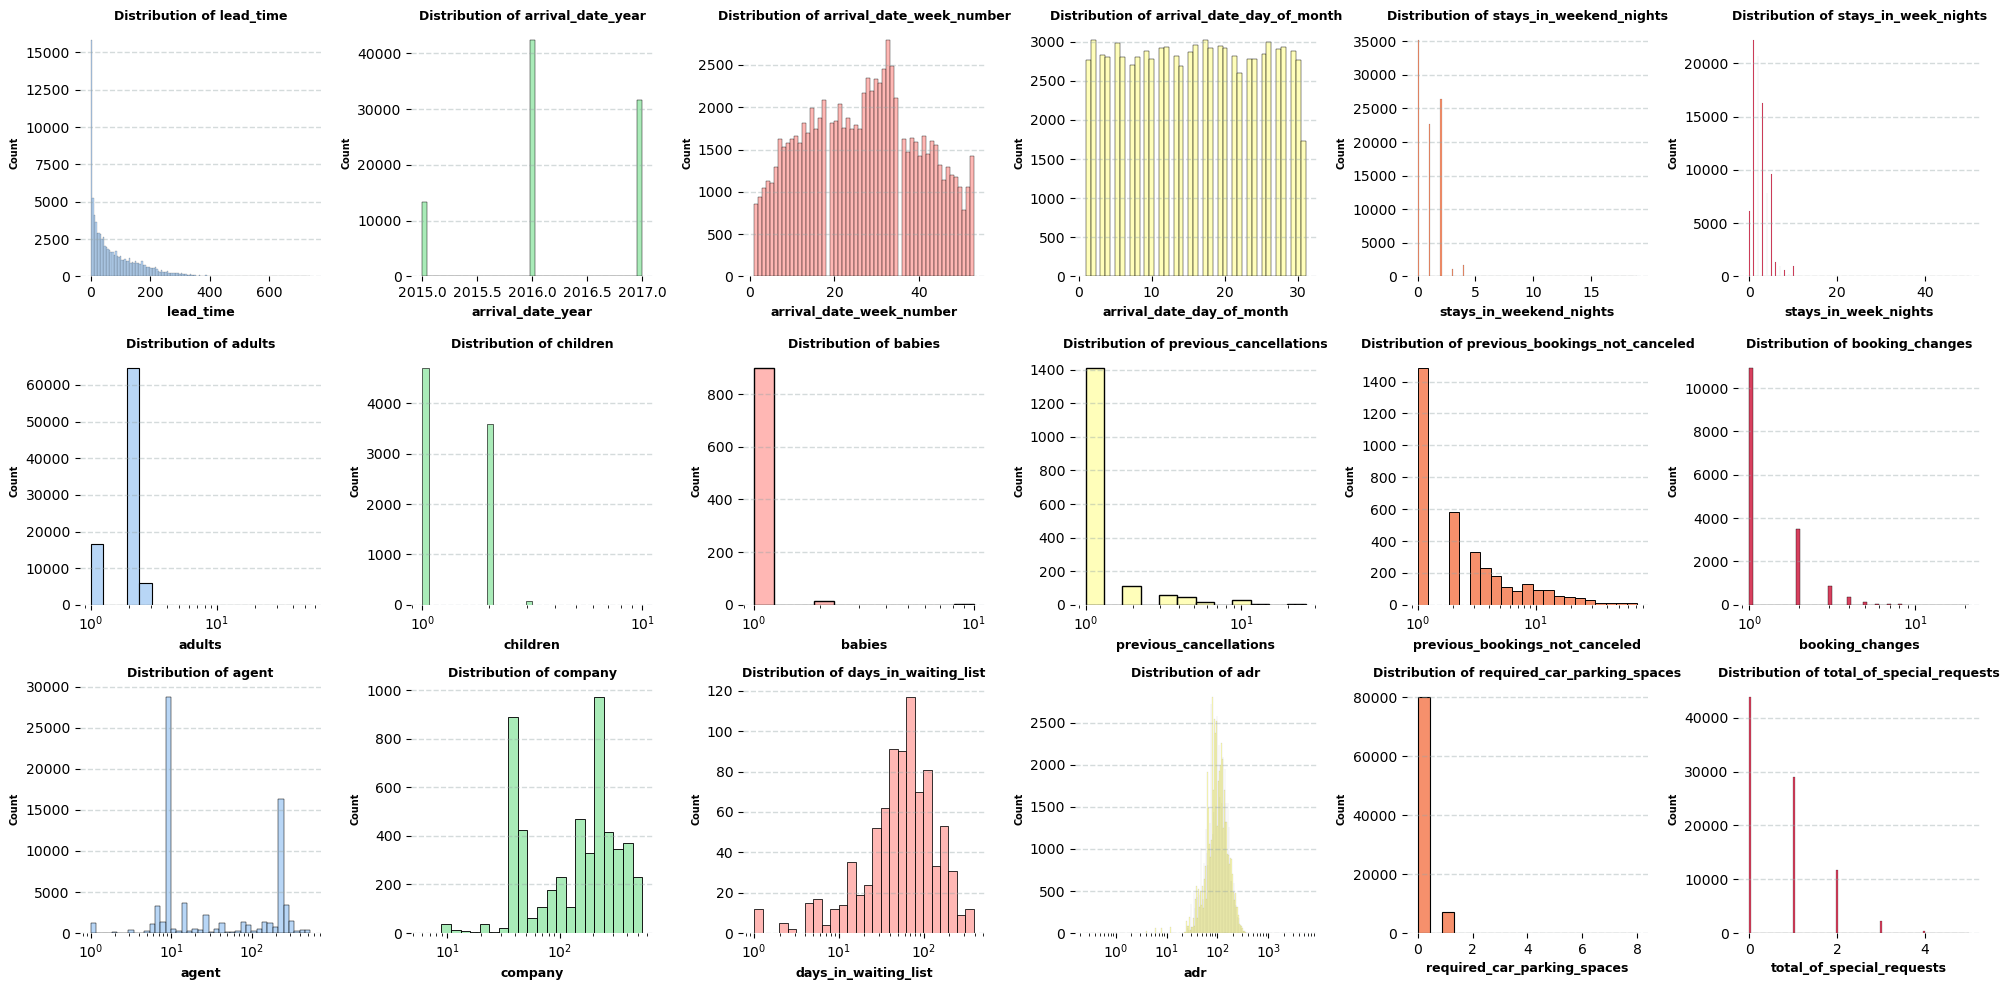

In [13]:
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#fffea3', '#f36b3b','#CC0028']
nrows=3
ncols=6
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))

cols = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            ax_i = ax[r,c]
            if i in [6,7,8,9,10,11,12,13,14,15]:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i, log_scale=True, color=color[np.mod(i,6)])
            else:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i,color=color[np.mod(i,6)])
            p.axes.set_title(f"Distribution of {cols[i]}",fontsize=9, color='k', weight='bold')
            p.axes.set_xlabel(f"{cols[i]}",fontsize=9, weight='bold')
            p.axes.set_ylabel('Count',fontsize=7, weight='bold')
            p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## 2. Phân phối dữ liệu không phải kiểu số (Category)

Đối với các cột có kiểu dữ liệu không phải là số, ta sẽ tính:
- Tỷ lệ giá trị bị thiếu [`Missing_ratio`]
- Số lượng giá trị duy nhất trong mỗi cột [`Num_diff_vals`]
- Phân phối từng cột (số lần xuất hiện của từng giá trị duy nhất) [`Distribution`]

In [14]:
str_col_name = cate_cols.copy()
str_col_dist_df = pd.DataFrame(columns=str_col_name,
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = hotel_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = hotel_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (hotel_df[str_col_name] == '').sum() / hotel_df.shape[0] * 100
str_col_dist_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
Missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Num_diff_vals,2,12,5,178,8,5,10,12,3,4,3,926
Distribution,"{'City Hotel': 53428, 'Resort Hotel': 33968}","{'August': 11257, 'July': 10057, 'May': 8355, ...","{'BB': 67978, 'SC': 9481, 'HB': 9085, 'Undefin...","{'PRT': 27453, 'GBR': 10433, 'FRA': 8837, 'ESP...","{'Online TA': 51618, 'Offline TA/TO': 13889, '...","{'TA/TO': 69141, 'Direct': 12988, 'Corporate':...","{'A': 56552, 'D': 17398, 'E': 6049, 'F': 2823,...","{'A': 46313, 'D': 22432, 'E': 7195, 'F': 3627,...","{'No Deposit': 86251, 'Non Refund': 1038, 'Ref...","{'Transient': 71986, 'Transient-Party': 11727,...","{'Check-Out': 63371, 'Canceled': 23011, 'No-Sh...","{'2/14/2016': 211, '5/25/2017': 205, '10/21/20..."


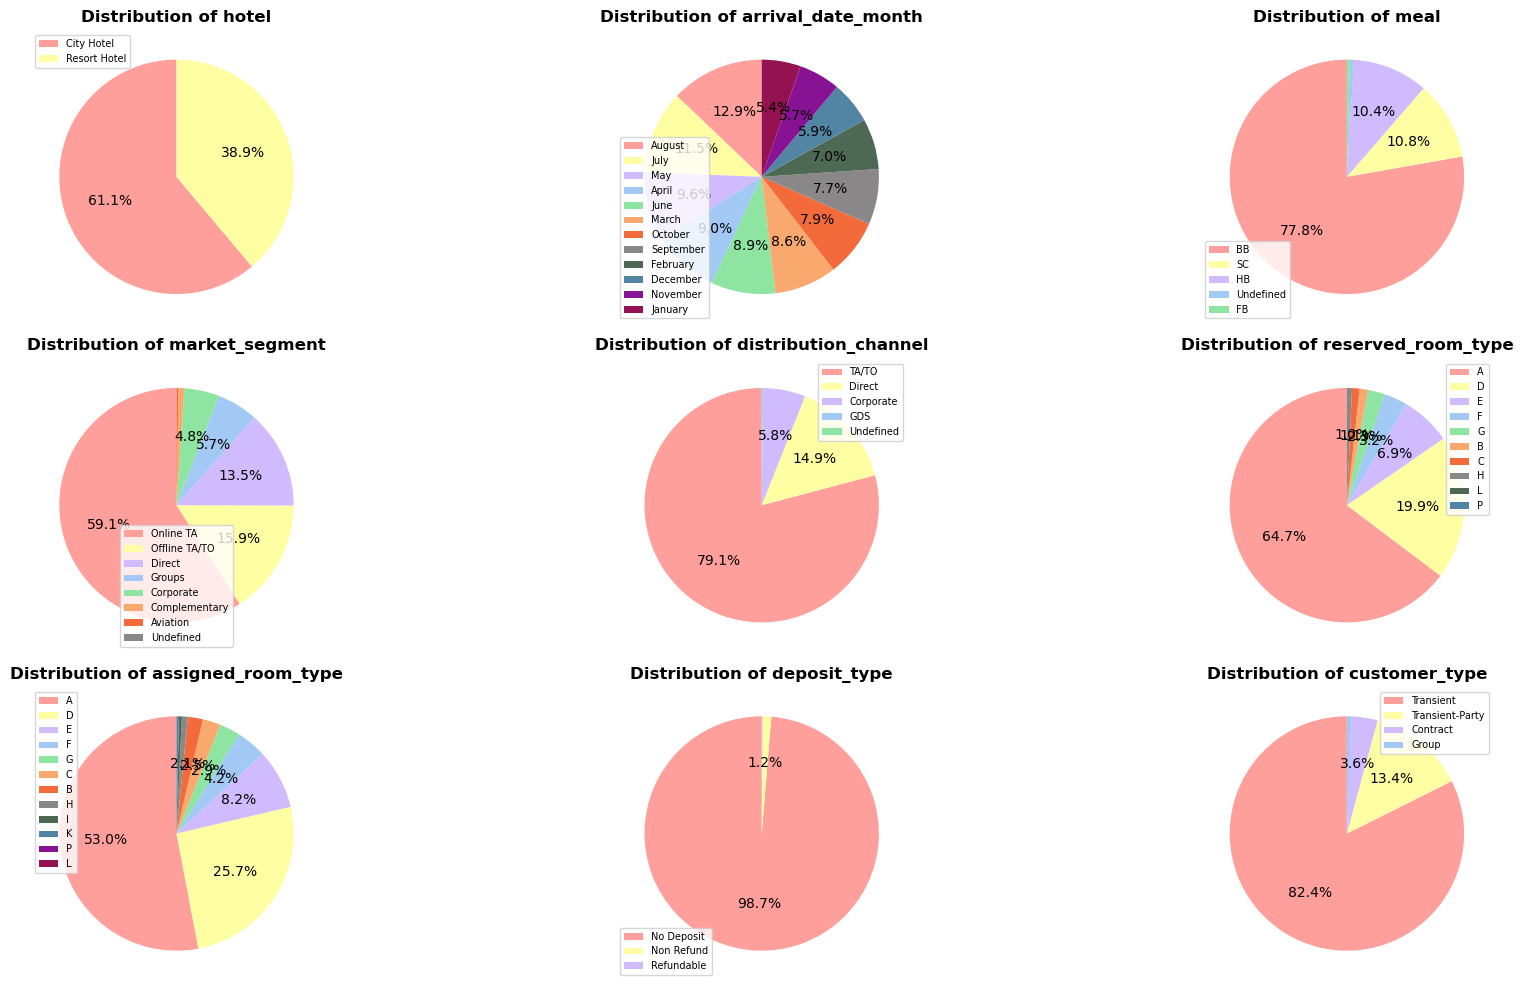

In [15]:
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1',"#faa96e","#f36b3b", '#8a8788', '#4d6953', '#5284a3', '#871294', '#941251']
nrows=3
ncols=3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
cols = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']
type_counts = hotel_df[cols].value_counts()
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            type_counts = hotel_df[cols[i]].value_counts()
            ax_i = ax[r,c]
            ax_i.pie(type_counts,autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '',startangle=90,colors=colors) 
            ax_i.set_title(f'Distribution of {cols[i]}', fontsize=12, weight='bold')
            if i == 1:
                ax_i.legend(type_counts.index,fontsize=7,loc='lower left')
            else:
                ax_i.legend(type_counts.index,fontsize=7,loc='best')

sns.despine(left=True, bottom=True)
plt.tight_layout()

# III. EDA 2D

## 1. Phân tích hệ số tương quan giữa các cột số

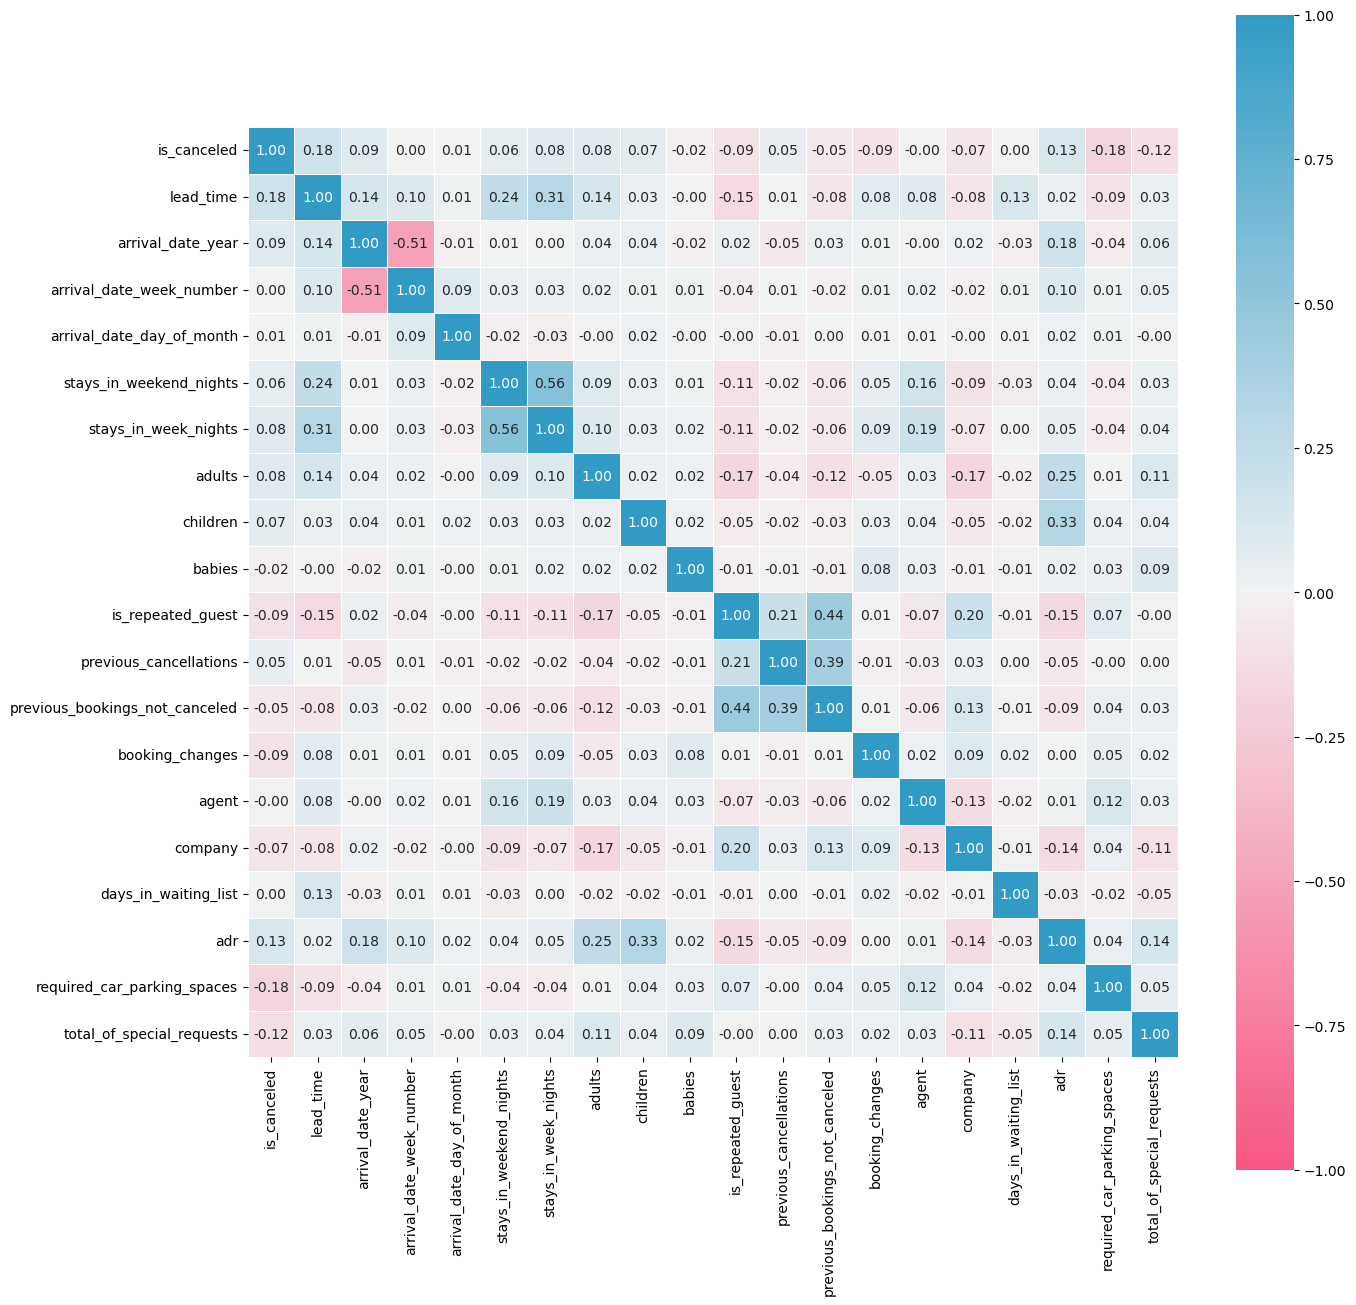

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
ax = sns.heatmap(hotel_df[numeric_cols].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap=cmap, vmin=-1, vmax=1)

## 2. Phân tích dữ liệu bằng Scatter Plot cho 2 biến Numerical

### 👉 **Phân tích cột `booking_changes` và `days_in_waiting_list`** 

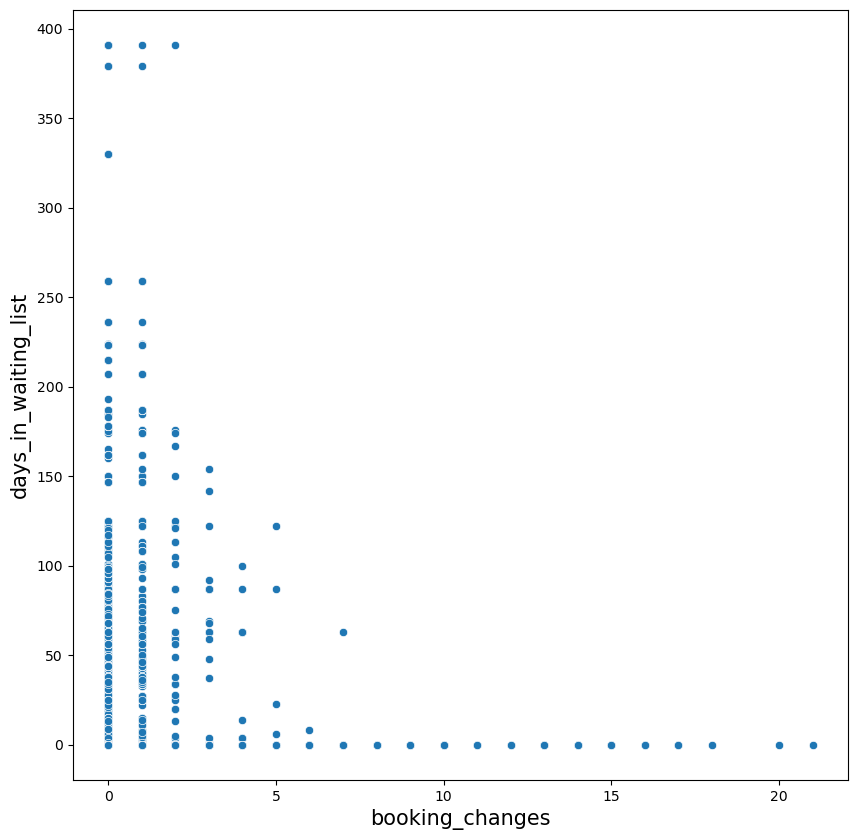

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="booking_changes", y="days_in_waiting_list")
plt.xlabel('booking_changes', size = 15)
plt.ylabel('days_in_waiting_list', size = 15)
plt.show()

**Nhận xét chung:**
- `booking_changes` và `days_in_waiting_list` có mối tương quan, tuy nhiên mối tương quan này không hề tuyến tính. Vẫn xuất hiện 1 vài điểm nằm ngoài xu hướng chung

### 👉 **Phân tích cột `stays_in_weekend_nights` và `stays_in_week_nights`** 

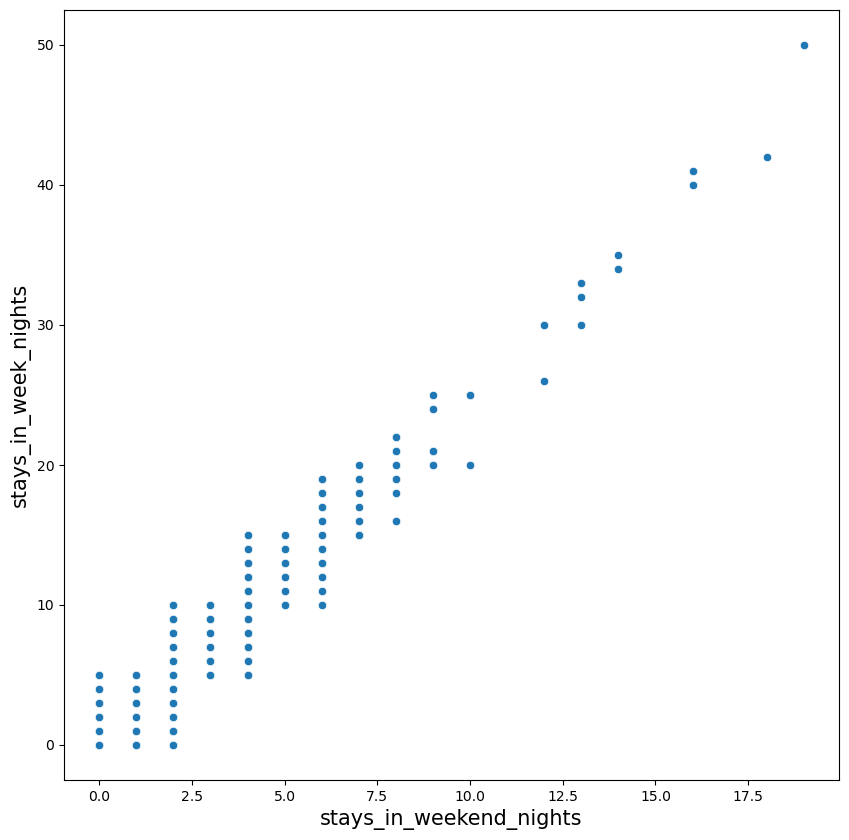

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="stays_in_weekend_nights", y="stays_in_week_nights")
plt.xlabel('stays_in_weekend_nights', size = 15)
plt.ylabel('stays_in_week_nights', size = 15)
plt.show()

**Nhận xét chung:**
- Nhìn chung `stays_in_weekend_nights` và `stays_in_week_nights` có mối tương quan dương. Khách hàng đến khách sạn nếu ở nhiều ngày trong tuần thì cũng sẽ ở thêm vào cuối tuần
- Từ biểu đồ có thể thấy rằng phần lớn du khách đến khách sạn thường sẽ có xu hướng ở dài hạn. Thêm vào đó, du khách phần lớn đến vì nghỉ dưỡng hoặc du lịch nên họ thường ở lâu trong khách sạn

## 3. Phân tích dữ liệu bằng Bar Chart cho biến Numerical và Category

### 👉 **Phân tích cột `customer_type` và `days_in_waiting_list`** 

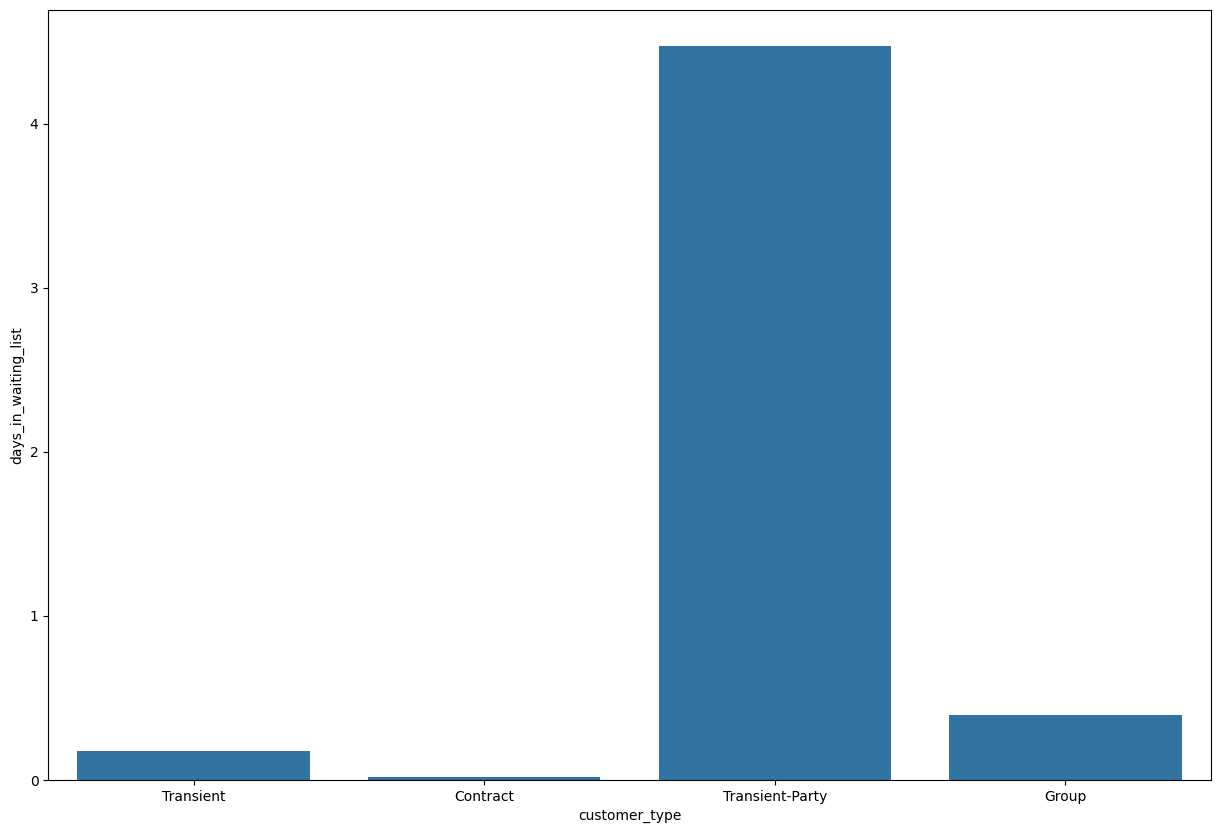

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(data=hotel_df, x='customer_type', y='days_in_waiting_list',errorbar=None);

**Nhận xét chung:**
- Nhìn chung, những khách hàng loại `Transient-Party` có thời gian chờ đợi trong danh sách chờ lâu nhất. `Transient-Party` thường bao gồm các nhóm du lịch nhỏ hoặc nhóm người đi công tác. Vì vậy, số lượng phòng cần đặt cho nhóm này có thể lớn hơn so với các nhóm khách hàng khác, dẫn đến việc phải đợi lâu hơn trong danh sách chờ để có được các phòng.
- Khách hàng đến khách sạn để làm ăn thì sẽ được khách sạn ưu tiên xét duyệt phòng và nằm trong danh sách chờ ngắn nhất. Trung bình thường chưa đến 1 ngày đã đặt được phòng trong khi khách `Transient-Party` phải chờ đến hơn 4 ngày. Khách hàng đến để làm ăn thường có nhu cầu ở lại khách sạn trong thời gian ngắn và không phải chờ đợi lâu để có phòng. Điều này có thể do họ có lịch trình linh hoạt hoặc cần phải đặt phòng gấp.

### 👉 **Phân tích cột `customer_type` và `stays_in_week_nights`** 

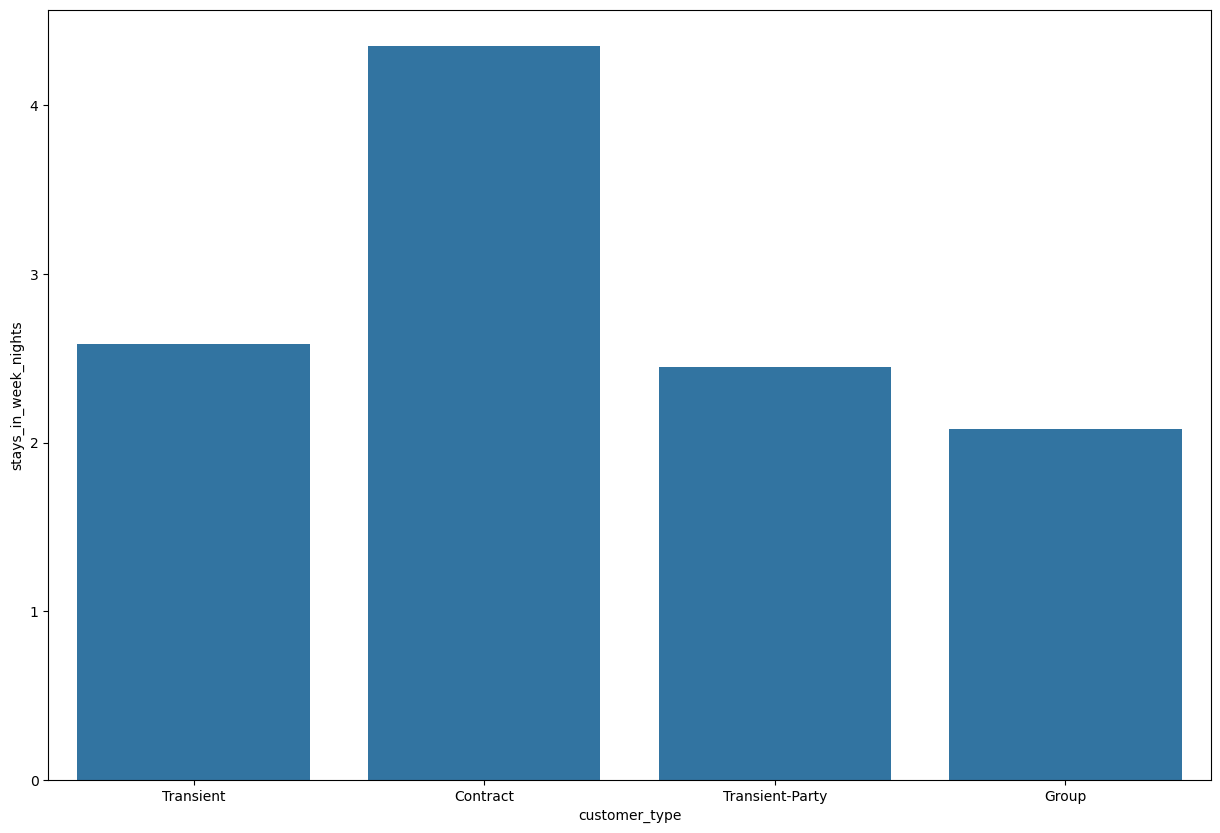

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(data=hotel_df, x='customer_type', y='stays_in_week_nights',errorbar=None);

### 👉 **Phân tích cột `arrival_date_month` và `lead_time`** 

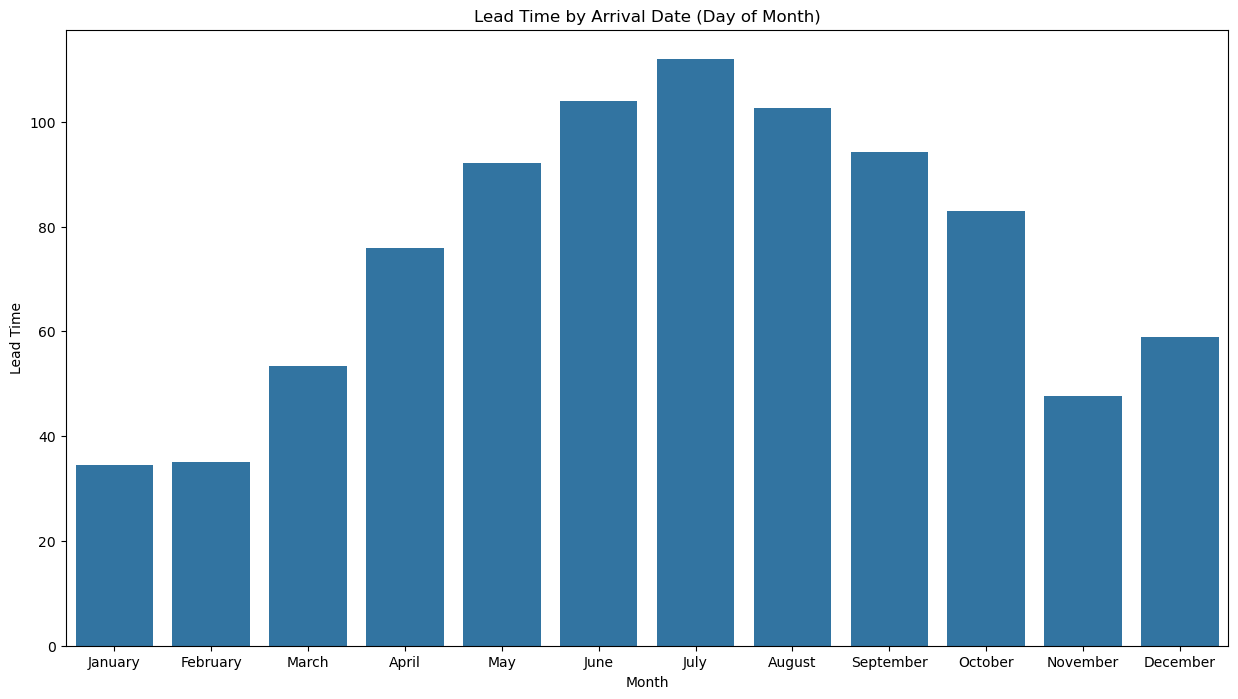

In [21]:
# Tạo biểu đồ cột
plt.figure(figsize=(15, 8))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=hotel_df, x='arrival_date_month', y='lead_time', order=months_order,errorbar=None)

# Đặt tiêu đề và nhãn trục
plt.title('Lead Time by Arrival Date (Day of Month)')
plt.xlabel('Month')
plt.ylabel('Lead Time')

# Hiển thị biểu đồ
plt.show()

**Nhận xét chung:**

- Nhìn chung, có xu hướng rằng từ tháng 4 đến tháng 10, khách hàng thường đặt phòng trước ít nhất 2 tháng để đảm bảo có phòng khi đến khách sạn. Điều này có thể chỉ ra rằng trong khoảng thời gian này là thời điểm cao điểm và có thể có tình trạng hết phòng do nhu cầu đặt phòng tăng lên, khiến mọi người thường phải đặt trước.
- 
Đặc biệt, trong các tháng 6, 7 và 8, thời gian đặt phòng trước thường là 3 tháng. Điều này có thể được lí giải bằng sự phổ biến của mùa du lịch hè và nhu cầu lưu trú cao trong thời gian này. Khách hàng thường muốn đảm bảo có phòng ở những điểm du lịch phổ biến và các kỳ nghỉ hè, do đó họ thường đặt phòng trước ít nhất 3 tháng để đảm bảo có chỗ ở khi đến.

Như vậy, từ các quan sát trên, có thể kết luận rằng việc đặt phòng trước từ 2 đến 3 tháng trong các tháng cao điểm là một thói quen phổ biến của khách hàng để đảm bảo có trải nghiệm lưu trú tốt nhất và tránh tình trạng hết phòng.

## 4. Tính tỷ trọng đối với hai biến Category

Trong tập dữ liệu, cột **`arrival_date_year`** ban đầu có kiểu dữ liệu số (numerical), tuy nhiên theo ý nghĩa của cột, nó biểu thị cho thông tin về năm, nên ta có thể xem nó như một biến dạng category.

### 👉 **Phân tích tỷ trọng khách đặt khách sạn theo mùa của từng năm**

In [22]:
df = hotel_df.copy()
# Tạo một bản đồ ánh xạ từ tên tháng sang số tháng
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Áp dụng bản đồ ánh xạ để chuyển đổi cột 'arrival_date_month' thành giá trị số
df['Month'] = df['arrival_date_month'].map(month_to_number)

# Gộp các tháng thành mùa
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=seasons, include_lowest=True)

booking_per_season = df.groupby(['arrival_date_year', 'Season']).size().reset_index(name='Count')
booking_per_season['Percentage'] = booking_per_season['Count'] / booking_per_season.groupby('arrival_date_year')['Count'].transform('sum') * 100

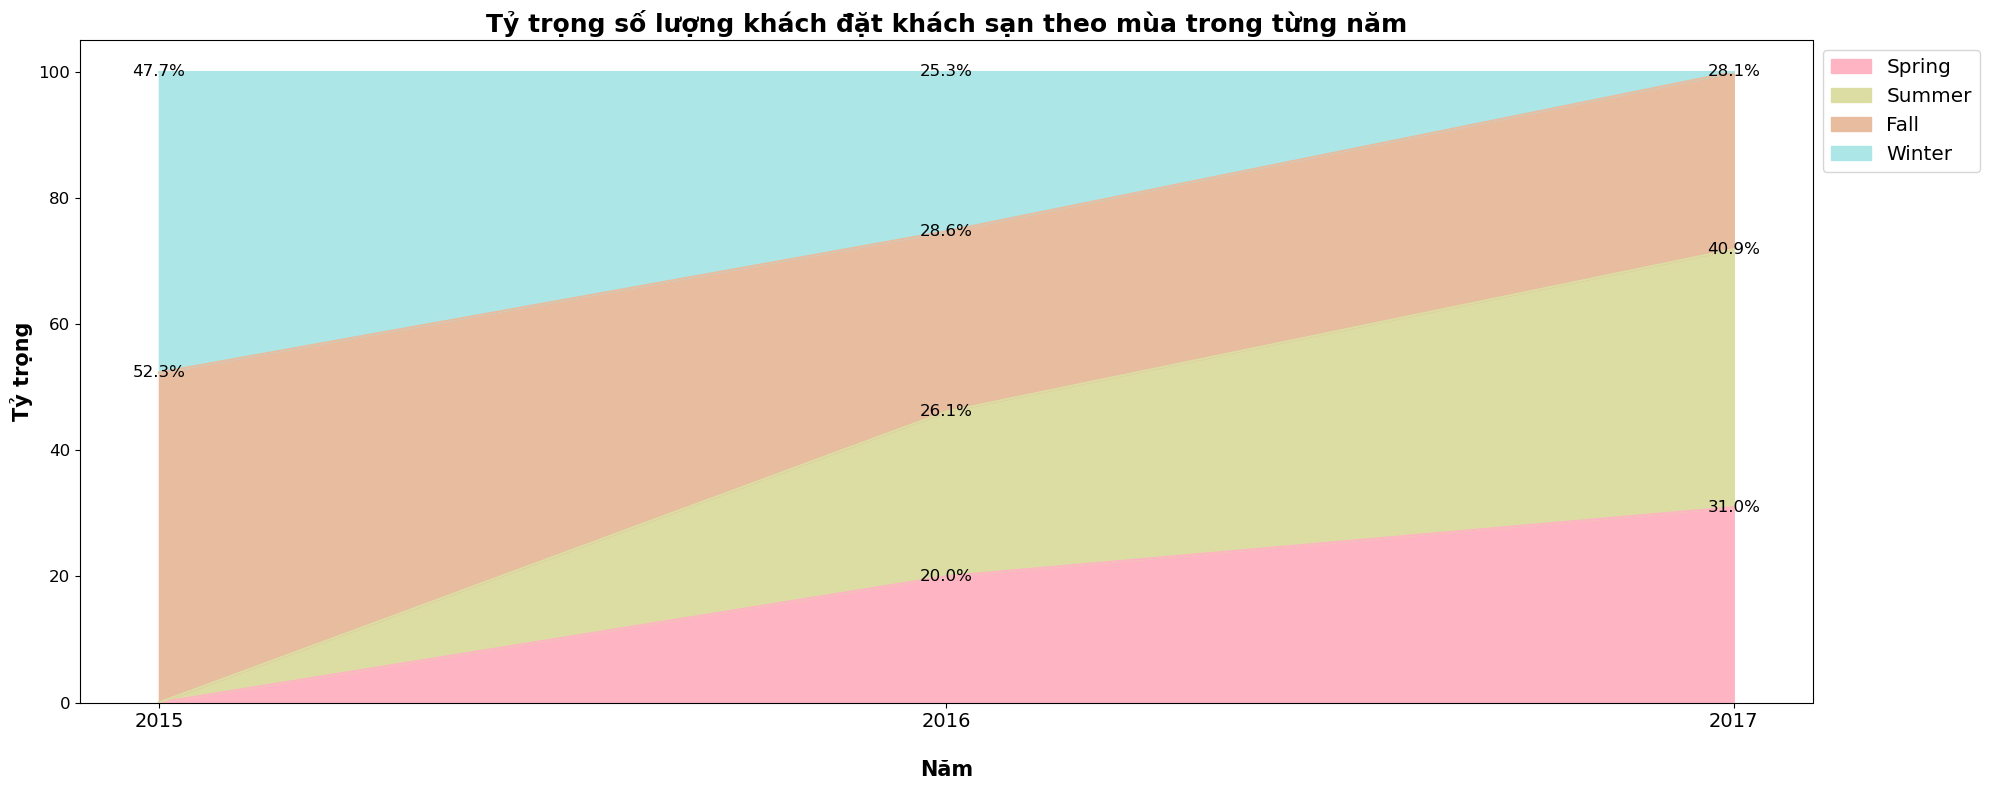

In [23]:
# Đặt màu cho từng mùa
season_palette = {
    'Spring': '#ffb4c3',
    'Summer': '#dcdda3',
    'Autumn': '#e7bc9f',
    'Winter': '#ade6e7'
}

# Đặt mặc định palette cho Seaborn
sns.set_palette(season_palette.values())

# Tạo subplot và đặt kích thước
fig, ax = plt.subplots(figsize=(20, 8))

# Vẽ biểu đồ diện tích
booking_per_season.groupby(['arrival_date_year', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax)

# Đặt tiêu đề và nhãn cho trục x và trục y
ax.set_title('Tỷ trọng số lượng khách đặt khách sạn theo mùa trong từng năm', fontsize=18, weight='bold')
ax.set_xlabel('\nNăm', fontsize=15, weight='bold')
ax.set_ylabel('Tỷ trọng', fontsize=15, weight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0), fontsize='x-large')
ax.set_xticks(range(2015,2018,1))
# Đặt kích thước của nhãn trục x
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)

# Đặt các điểm chú thích trên biểu đồ
for year, row in booking_per_season.groupby('arrival_date_year'):
    if year in ax.get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = year
            temp += percentage
            y_pos = temp
            if percentage > 0:  # Kiểm tra nếu tỷ trọng > 0% thì mới hiển thị số trên biểu đồ 
                ax.text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
sns.reset_defaults()

**Nhận xét chung:**
- Xét năm 2015:
  + Chỉ có tỷ trọng của mùa Thu và mùa Đông xuất hiện vì có thể dữ liệu được thu thập từ mùa Thu nên mùa Xuân và Hè không có dữ liệu)
  + Tỷ trọng đặt phòng vào mùa Thu cao hơn mùa Đông khoảng năm 5%
  + Có thể thấy, năm 2015, mùa Thu là mùa có đông khách đến khách sạn nhất

- Xét năm 2016:
  + Tỷ trọng của 4 mùa trong năm này phân bố khá đều
  + Tỷ trọng khách đặt khách sạn vào mùa Thu vẫn là cao nhất và theo sau khá sát là mùa Hè
  + Mùa Thu và mùa Hè là mùa cao điểm của khách sạn vào năm này

- Xét năm 2017:
  + Không có tỷ trọng mùa Đông trong năm này vì có thể dữ liệu thu thập đến trước đó thì dừng nên không có dữ liệu
  + Tỷ trọng khách vào mùa Hè tăng hơn 10% trong năm này và dẫn đầu
  + Tỷ trọng khách vào mùa Xuân cũng khá cao hơn 10% và xếp sau mùa Hè
  + Trong khi đó tỷ trọng mùa Thu lại vẫn giữ nguyên và không tăng đáng kể

Nhìn chung thì mùa hè và mùa thu có xu hướng là mùa cao điểm và lượng khách đến khách sạn khá cao trong 3 năm khảo sátá phòng và tình trạng phòng.

### 👉 **Phân tích cột `arrival_date_year` và `arrival_date_month`**

In [24]:
hotel_df.groupby(['arrival_date_year', 'arrival_date_month' ]).agg({'arrival_date_month': 'count'})/len(hotel_df)

arrival_date_month
arrival_date_year arrival_date_month                    
2015              August                        0.028068
                  December                      0.022678
                  July                          0.019154
                  November                      0.019051
                  October                       0.030894
                  September                     0.032484
2016              April                         0.043137
                  August                        0.050609
                  December                      0.036031
                  February                      0.032107
                  January                       0.021157
                  July                          0.044064
                  June                          0.040242
                  March                         0.043835
                  May                           0.043251
                  November                      0.038102
                  October                       0.048446
                  September                     0.044064
2017              April                         0.047348
                  August                        0.050128
                  February                      0.037668
                  January                       0.032542
                  July                          0.051856
                  June                          0.048606
                  March                         0.042130
                  May                           0.052348

### 👉 **Phân tích cột `customer_type` và `reservation_status`**

In [25]:
hotel_df.groupby(['customer_type', 'reservation_status' ]).agg({'reservation_status': 'count'})/len(hotel_df)

reservation_status
customer_type   reservation_status                    
Contract        Canceled                      0.005572
                Check-Out                     0.030059
                No-Show                       0.000286
Group           Canceled                      0.000572
                Check-Out                     0.005607
                No-Show                       0.000046
Transient       Canceled                      0.238089
                Check-Out                     0.575701
                No-Show                       0.009886
Transient-Party Canceled                      0.019063
                Check-Out                     0.113735
                No-Show                       0.001385

# IV. EDA 3D

## 1. Phân tích dữ liệu 3D cho 3 biến Numerical bằng Scatter Plot

## 2. Phân tích dữ liệu bằng Scatter plot 2D và màu đối với hai biến Numerical và Category.

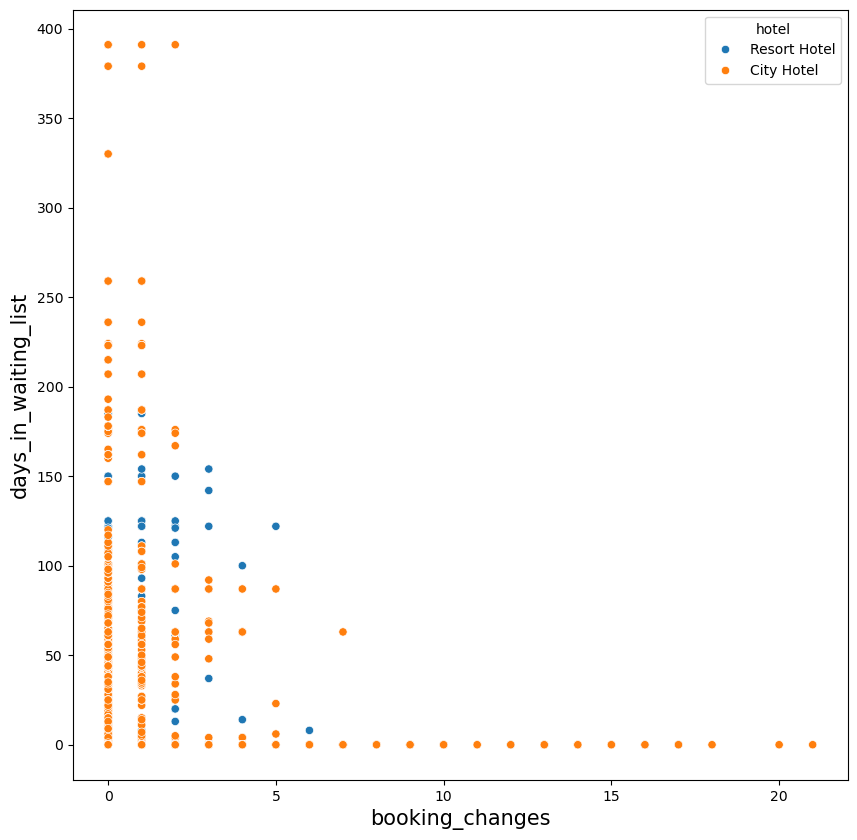

In [26]:
# EDA 3D
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="booking_changes", y="days_in_waiting_list", hue='hotel')
plt.xlabel('booking_changes', size = 15)
plt.ylabel('days_in_waiting_list', size = 15)
plt.show()

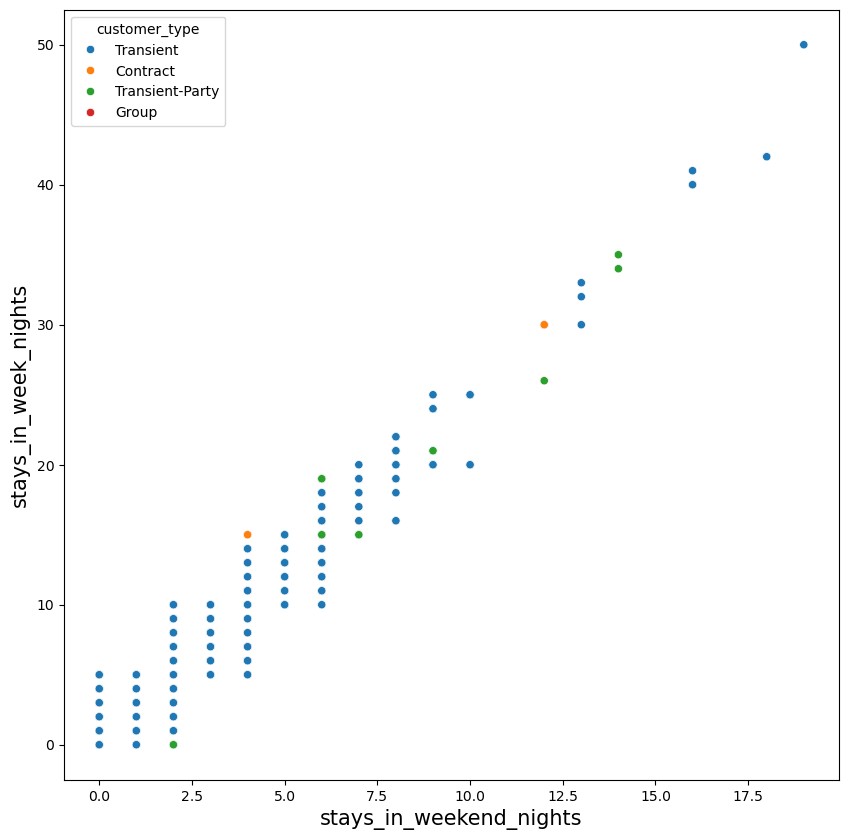

In [27]:
# EDA 3D
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="stays_in_weekend_nights", y="stays_in_week_nights", hue='customer_type')
plt.xlabel('stays_in_weekend_nights', size = 15)
plt.ylabel('stays_in_week_nights', size = 15)
plt.show()

## 3. Tỷ trọng theo bin chia theo thể loại với hai biến Category

# V. Insight